In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Data load 

In [3]:
dataset=pd.read_csv('housetrain.csv')

#**EDA**

In [4]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
dataset.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1363,1364,60,RL,73.0,8499,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,616,616,GasA,...,Y,SBrkr,616,796,0,1412,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2007.0,Fin,2,432,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,3,2007,New,Partial,156932
288,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,...,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
361,362,50,RL,NaN,9144,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1940,1982,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,399,Unf,0,484,883,GasA,...,Y,SBrkr,988,517,0,1505,1,0,1,0,3,1,TA,8,Typ,0,NaN,Detchd,1940.0,Unf,1,240,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,145000
1201,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,866,866,GasA,...,Y,SBrkr,866,913,0,1779,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1998.0,RFn,2,546,TA,TA,Y,198,36,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
174,175,20,RL,47.0,12416,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1986,1986,Gable,CompShg,VinylSd,Plywood,Stone,132.0,TA,TA,CBlock,Gd,Fa,No,ALQ,1398,LwQ,208,0,1606,GasA,...,Y,SBrkr,1651,0,0,1651,1,0,2,0,3,1,TA,7,Min2,1,TA,Attchd,1986.0,Fin,2,616,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,184000


In [8]:
dataset.shape

(1460, 81)

In [12]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
#dataset[ dataset.isnull().any(axis=1) ] # rows li fehom at least 1 missing value
dataset[ dataset.isnull().all(axis=1) ] # rows li columns kol te3ha null

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


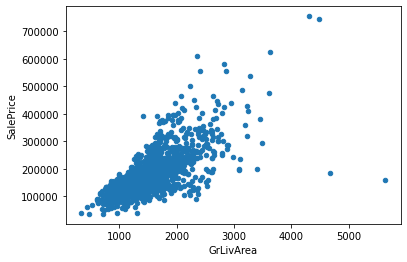

In [16]:

var='GrLivArea'
data=pd.concat([dataset['SalePrice'],dataset[var]],axis=1)# data fehe sale price oul var elli hia griliv area 
data.plot.scatter(x=var,y='SalePrice',ylim=(0.800000));#tamel visualisation bi ni9at (scatter)


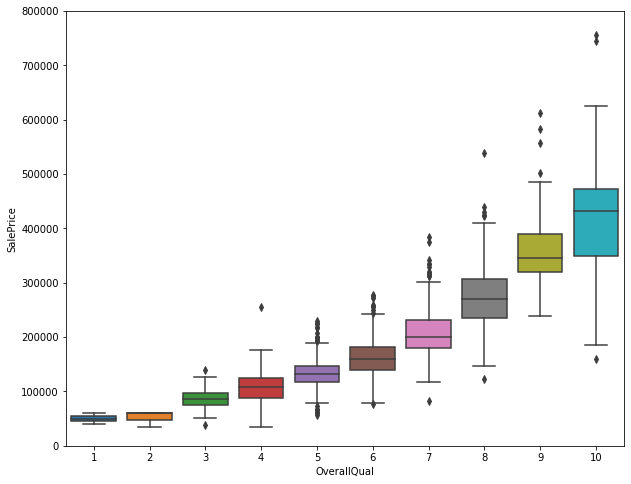

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8)) #afficher la courbe de f en fonction de x avec adn fig size el kobr 
fig = sns.boxplot(x=var, y="SalePrice", data=data)# twarrina tsawaer en box thot fehe x ou y ou data mtaek 
fig.axis(ymin=0, ymax=800000);# les valeur de y 

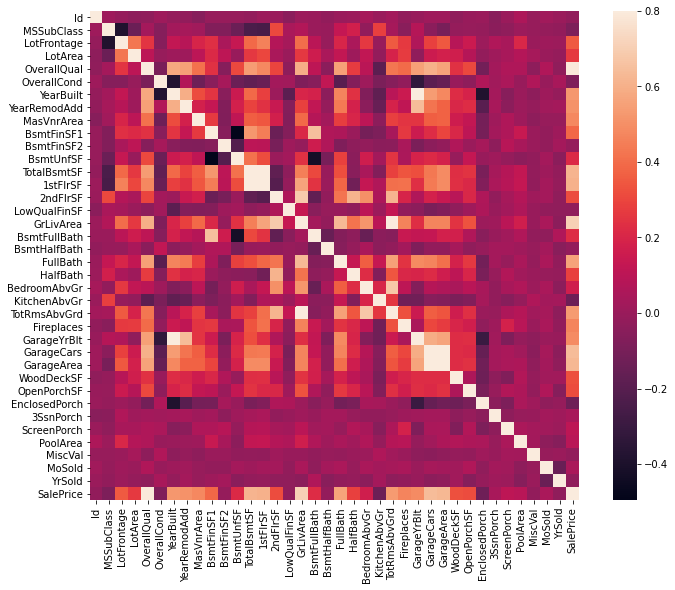

In [19]:
#correlation matrix
corrmat = dataset.corr() # effectuer le comatrice de correlation 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True); # vlmax :Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
   

In [20]:
#dataset[['LotFrontage','OveraallQual','YearBuilt','MasvnrArea',]]

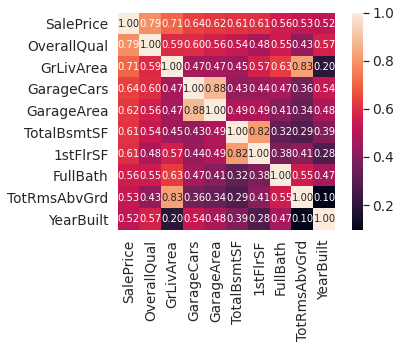

In [24]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap # takhou 10 variable mouhemmine 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #   takhou les key mta valeurs :Return the first n rows with the largest values in columns 
cm = np.corrcoef(dataset[cols].values.T)# tati les valeur mta correlation mta kol contenue 
sns.set(font_scale=1.25) # afficher le 5at 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


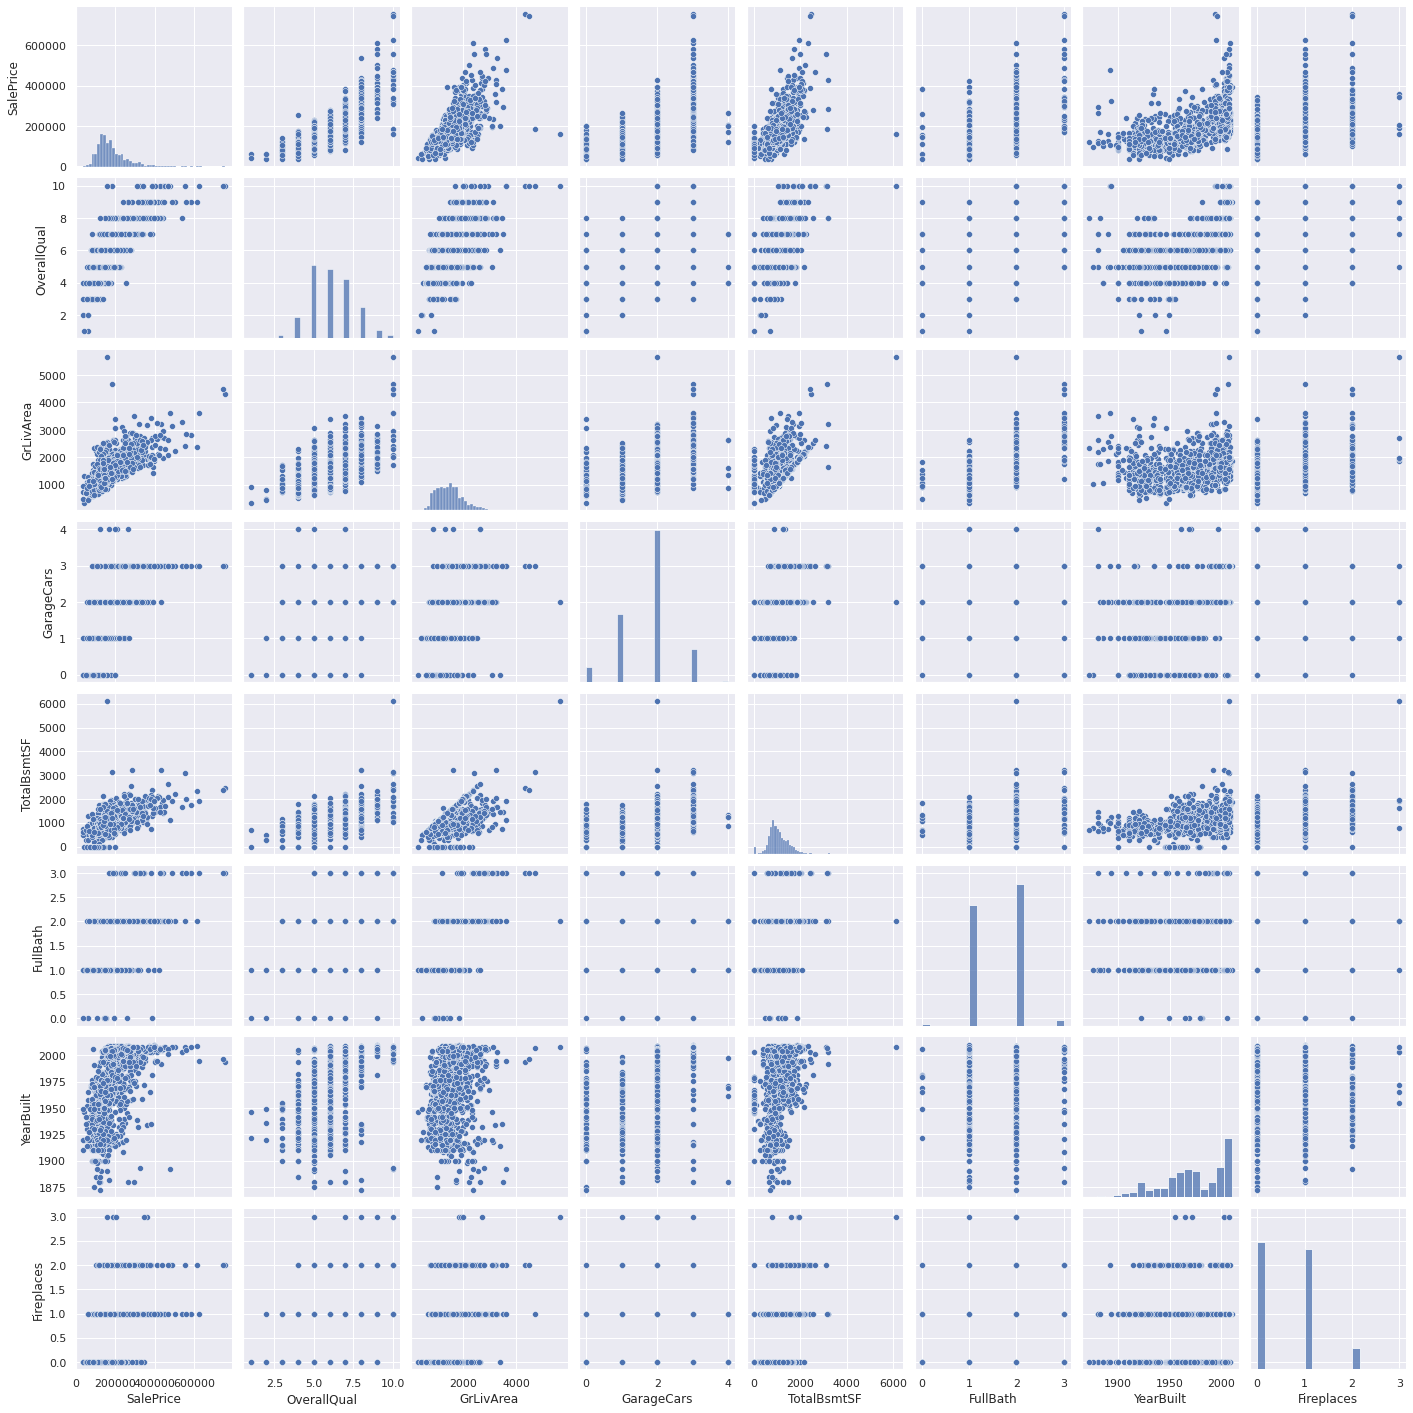

In [26]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','Fireplaces'] #♣ taffichi kolchey 
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

In [27]:
dataset.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


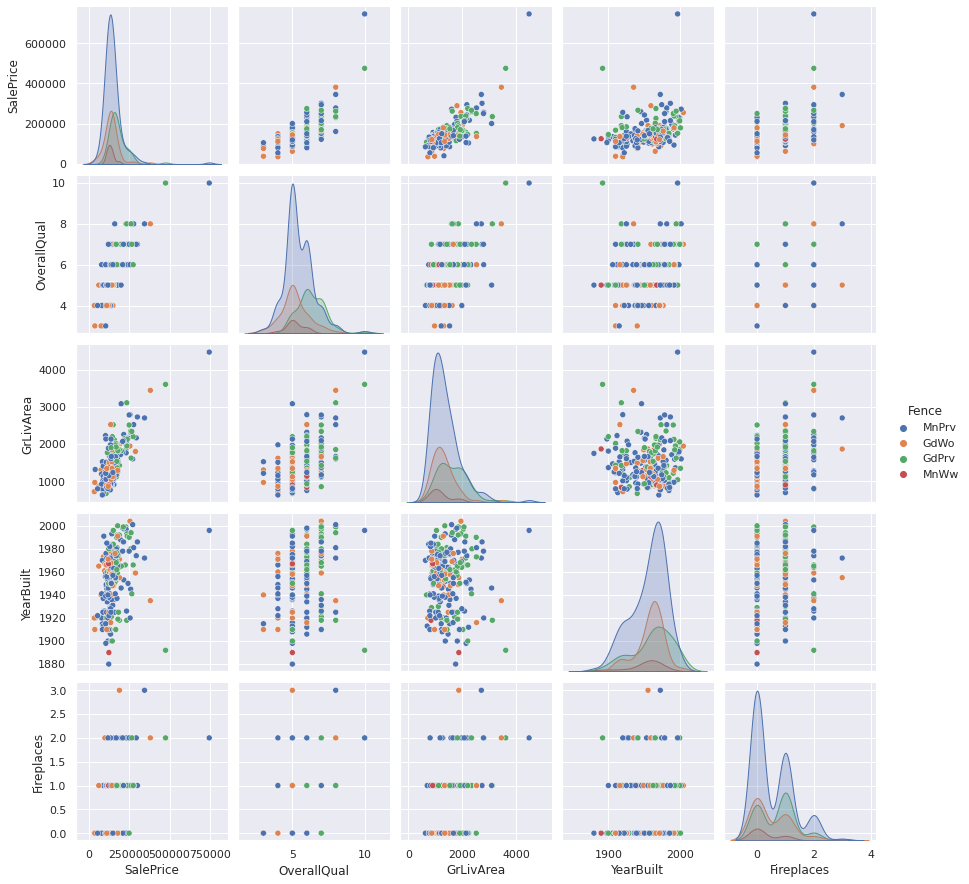

In [43]:

cols = ['SalePrice', 'OverallQual', 'GrLivArea','YearBuilt','Fireplaces','Fence'] #♣ taffichi kolchey 
sns.pairplot(dataset[cols],hue='Fence')
#alley-CentralAir

In [44]:
# DataFrame with important variables 
df=dataset[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','Fireplaces','Alley','CentralAir']] #♣ taffichi kolchey 


In [45]:
df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Fireplaces,Alley,CentralAir
0,208500,7,1710,2,856,2,2003,0,NaN,Y
1,181500,6,1262,2,1262,2,1976,1,NaN,Y
2,223500,7,1786,2,920,2,2001,1,NaN,Y
3,140000,7,1717,3,756,1,1915,1,NaN,Y
4,250000,8,2198,3,1145,2,2000,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999,1,NaN,Y
1456,210000,6,2073,2,1542,2,1978,2,NaN,Y
1457,266500,7,2340,1,1152,2,1941,2,NaN,Y
1458,142125,5,1078,1,1078,1,1950,0,NaN,Y


In [48]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # tati el  el missing data be tertib 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Alley,1369,0.937671
CentralAir,0,0.000000
Fireplaces,0,0.000000
YearBuilt,0,0.000000
FullBath,0,0.000000
TotalBsmtSF,0,0.000000
GarageCars,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000
SalePrice,0,0.000000


In [49]:
df.drop('Alley',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Fireplaces,CentralAir
0,208500,7,1710,2,856,2,2003,0,Y
1,181500,6,1262,2,1262,2,1976,1,Y
2,223500,7,1786,2,920,2,2001,1,Y
3,140000,7,1717,3,756,1,1915,1,Y
4,250000,8,2198,3,1145,2,2000,1,Y
...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999,1,Y
1456,210000,6,2073,2,1542,2,1978,2,Y
1457,266500,7,2340,1,1152,2,1941,2,Y
1458,142125,5,1078,1,1078,1,1950,0,Y


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


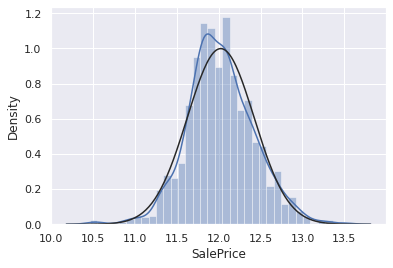

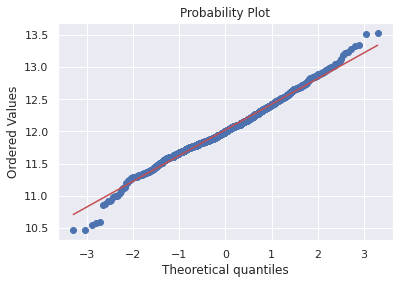

In [74]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [53]:
# we do the log function 
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


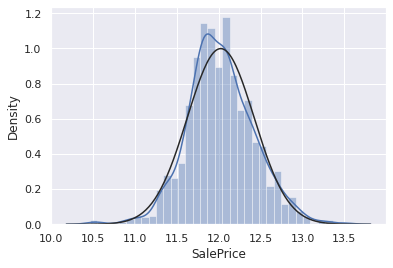

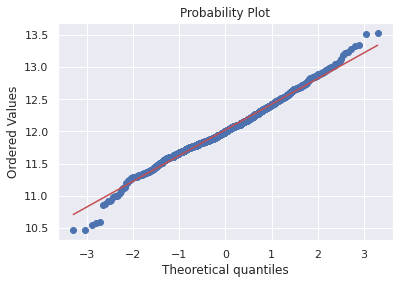

In [55]:
#after the log magic 
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


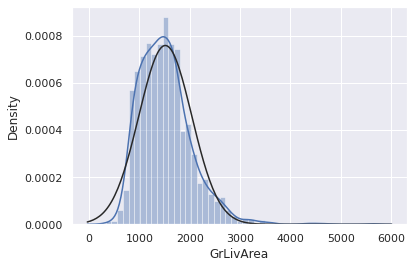

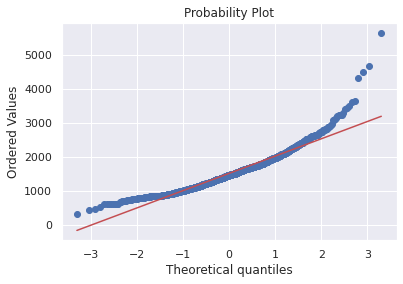

In [57]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

In [58]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


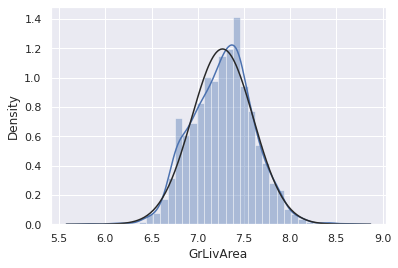

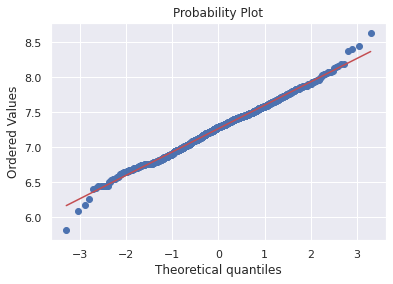

In [60]:
#transformed histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


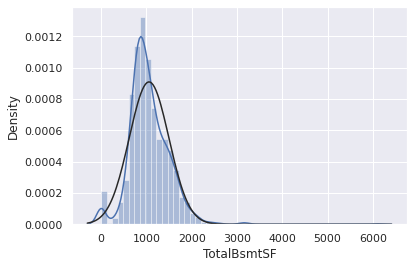

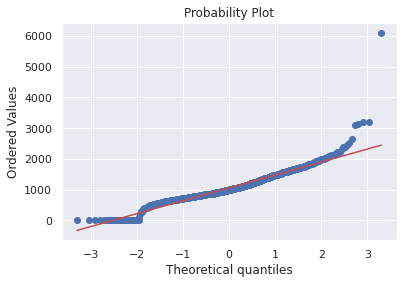

In [62]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [63]:
#create column for new variable 
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


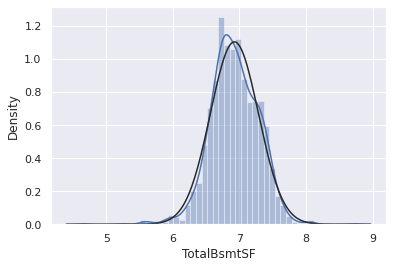

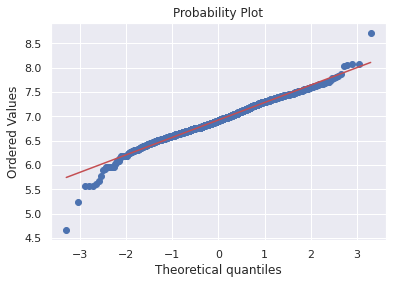

In [64]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


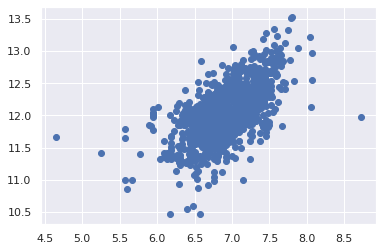

In [66]:
#scatter plot new one 
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], df[df['TotalBsmtSF']>0]['SalePrice']);

#Categorical encoding 


In [67]:
df = pd.get_dummies(df)


In [68]:
df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Fireplaces,HasBsmt,CentralAir_N,CentralAir_Y
0,12.247694,7,7.444249,2,6.752270,2,2003,0,1,0,1
1,12.109011,6,7.140453,2,7.140453,2,1976,1,1,0,1
2,12.317167,7,7.487734,2,6.824374,2,2001,1,1,0,1
3,11.849398,7,7.448334,3,6.628041,1,1915,1,1,0,1
4,12.429216,8,7.695303,3,7.043160,2,2000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,7.406711,2,6.859615,2,1999,1,1,0,1
1456,12.254863,6,7.636752,2,7.340836,2,1978,2,1,0,1
1457,12.493130,7,7.757906,1,7.049255,2,1941,2,1,0,1
1458,11.864462,5,6.982863,1,6.982863,1,1950,0,1,0,1


In [71]:
# preparing the data 
features=df.drop('SalePrice',axis=1)
labels=df['SalePrice']

In [72]:
features

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Fireplaces,HasBsmt,CentralAir_N,CentralAir_Y
0,7,7.444249,2,6.752270,2,2003,0,1,0,1
1,6,7.140453,2,7.140453,2,1976,1,1,0,1
2,7,7.487734,2,6.824374,2,2001,1,1,0,1
3,7,7.448334,3,6.628041,1,1915,1,1,0,1
4,8,7.695303,3,7.043160,2,2000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,6.859615,2,1999,1,1,0,1
1456,6,7.636752,2,7.340836,2,1978,2,1,0,1
1457,7,7.757906,1,7.049255,2,1941,2,1,0,1
1458,5,6.982863,1,6.982863,1,1950,0,1,0,1


In [85]:
labels

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [88]:
#feature scaling 
# Method 2: Normalisation, (entre 0 et 1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
features[['YearBuilt']] = mms.fit_transform(features[['YearBuilt']])


In [89]:
features

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Fireplaces,HasBsmt,CentralAir_N,CentralAir_Y
0,7,7.444249,2,6.752270,2,0.949275,0,1,0,1
1,6,7.140453,2,7.140453,2,0.753623,1,1,0,1
2,7,7.487734,2,6.824374,2,0.934783,1,1,0,1
3,7,7.448334,3,6.628041,1,0.311594,1,1,0,1
4,8,7.695303,3,7.043160,2,0.927536,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,6.859615,2,0.920290,1,1,0,1
1456,6,7.636752,2,7.340836,2,0.768116,2,1,0,1
1457,7,7.757906,1,7.049255,2,0.500000,2,1,0,1
1458,5,6.982863,1,6.982863,1,0.565217,0,1,0,1


#machine learning 

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)


In [91]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 50)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [92]:
regressor.score(X_train,y_train)

0.9995009805237017

In [93]:
regressor.score(X_test,y_test)

0.7279021700197599

In [94]:
y_pred = regressor.predict(X_test)


In [95]:
y_pred

array([12.49087558, 12.11669483, 11.65268741, 11.8313792 , 12.88664104,
       12.20607265, 11.94405832, 11.91505167, 11.88448902, 12.08390501,
       11.65268741, 12.14685329, 10.54270639, 12.06393288, 12.32363341,
       12.30817787, 11.88448902, 12.10348606, 12.86099861, 11.87756858,
       12.21849517, 13.34550693, 11.1331281 , 11.97035031, 11.9316358 ,
       12.08069081, 12.35978037, 12.10071213, 12.88664104, 12.66999847,
       11.9511804 , 11.73606902, 12.02704969, 11.9283409 , 11.79810441,
       11.81303006, 12.4049235 , 11.77528973, 11.23848862, 11.80931948,
       11.27720313, 12.12214741, 11.95761129, 12.8346813 , 11.87059991,
       12.66032792, 11.91170158, 12.27022047, 11.8913619 , 12.32163099,
       12.16597955, 12.52452638, 12.10071213, 11.85034872, 12.79917571,
       11.80333446, 11.60823564, 11.41861479, 12.92999148, 12.7367009 ,
       11.90496755, 11.9511804 , 12.24288662, 11.65268741, 12.95512746,
       12.13725833, 11.48246626, 12.08672589, 11.74006104, 11.80

In [83]:
y_test

930     12.211060
530     12.072541
1291    11.691072
1385    11.740061
305     12.631014
          ...    
453     12.254863
678     12.827992
190     12.660328
748     12.469974
1335    12.031124
Name: SalePrice, Length: 292, dtype: float64

In [97]:
# save the model ye sohbi 
from joblib import dump

dump(regressor, 'housePrediction.joblib')

['housePrediction.joblib']

#Deployment

In [ ]:
from joblib import load

def get_data():
  # method 1: API
  # method 2: Database
  return features
  
def preprocess_data(features):
  # Missing data
  # Type casting
  # Normalisation & standardisation
  return pre_processed_data

def main():
  # Model Loading
  model = load("antivirus_tree.joblib")

  # Getting the data to predict on
  features = get_data()
  pre_processed_data = preprocess(features)

  # Inference / Predict
  return model.predict(pre_processed_data)